# Montu Python /mnṯw ꜥꜣpp(y)/
## Astronomical ephemerides for the ancient world

<!-- This are visual tags that you may add to your package at the beginning with useful information on your package --> 
[![version](https://img.shields.io/pypi/v/montu?color=blue)](https://pypi.org/project/montu/)
[![downloads](https://img.shields.io/pypi/dw/montu)](https://pypi.org/project/montu/)

<p align="center"><img src="https://github.com/seap-udea/MontuPython/blob/main/montu/data/montu-python-logo-complete.png?raw=true" alt="Logo""/></p>
<!-- Fuente: https://symbolikon.com/downloads/montu-egyptian-god/-->

`MontuPython` (transileterated mnṯw ꜥꜣpp(y)) is a Python package intended to compute astronomical ephemerides in the ancient world, thousands of years before present. It was initially designed to compute ephemerides for the ancient Egypt, but it can also be used to study astronomical phenomena in other sites of interest for cultural astronomy (archeoastronomy).

## Download and install

Describe here how the package can be downloaded and install it in
different arquitectures.

If you are using `PyPI` installation it's as simple as:

```
pip install montu
```


In [ ]:
!pip install -q montu

## Preparation

> **NOTE:** This notebook is autogenerated with `Jupyter`. Some of the commands you will find here are only intended to make the README executable. In no sense are mandatory when using `MontuPython`.

In [2]:
import matplotlib.pyplot as plt
plt.ioff()
!mkdir -p gallery

## Quickstart

This README is at the same time an executable notebook. A runable version of the README can be find in the [Google Drive Repo of the package](https://drive.google.com/drive/folders/11L59yZ3A1g1ZT7v_dLDPwLMnRMR-tFgE?usp=sharing) as the file [`README.ipynb`]() 

In this section you should provide the most simple instructions to use
your package.

You may import the package using:

In [3]:
from montu import *

or for a safe import:

In [1]:
import montu
%load_ext autoreload
%autoreload 2

It is important that before using the most interesting commands of the package, load relevant data:

In [2]:
# Useful aliases
from montu import D2H, PRINTDF, TABLEDF
# Load stars
allstars = montu.Stars()

Two very basic codes that do something non-trivial albeit simple calculations in `MontuPython are:`

1. Compute the position of mars at a given time and while observing from a given site on Earth:

In [6]:
mtime = montu.Time('-2500-01-01 12:00:00.00')
tebas = montu.Observer(lon=33,lat=24)
mars = montu.Planet('Mars')
mars.where_in_sky(at=mtime,observer=tebas)
mars

Object Mars positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |       el |      az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|----------|---------|
| -142006202700 | 807954 | Mars   |    12.531 |    1.62045 |   8.53603 |    24.1114 | 8.53601 |  24.1141 | -41.6385 | 6.18997 |'
Object Mars conditions:
'

2. Obtain the information about a star from the stellar catalogue and, as in the case of the planet, obtain the position of the star in the sky.

In [10]:
mtime = montu.Time('-2500-01-01 12:00:00.00')
tebas = montu.Observer(lon=33,lat=24,height=0)
aldebaran = allstars.get_stars(ProperName='Aldebaran')
print(aldebaran)

1 star(s):
|    |   MN |    HD |   HR |   HIP | Gl        | Name      | OtherDesignations                                                                     | ProperName   | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |   VXJ2000 |   VYJ2000 |   VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |
|----|------|-------|------|-------|-----------|-----------|---------------------------------------------------------------------------------------|--------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|-----------|-----------|-----------|-----------|--------------|--------------|--------------|
| 14 |   15 | 29139 | 1457 | 21421 | Gl 171.1A | Al

### Working with stars

The stellar catalogue included with `MontuPython` contains more than 119 000 stars, including almost 9 000 visible to the naked eye.  Information about stars is stored in a `pandas Data Frame` whose columns are:

In [11]:
allstars.data.columns

Index(['MN', 'HD', 'HR', 'HIP', 'Gl', 'Name', 'OtherDesignations',
       'ProperName', 'Bayer', 'Flamsteed', 'Constellation', 'RAJ2000',
       'DecJ2000', 'pmRA', 'pmDec', 'RadVel', 'Distance', 'Vmag', 'Vmag_min',
       'Vmag_max', 'B-V', 'SpType', 'Luminosity', 'XJ2000', 'YJ2000', 'ZJ2000',
       'VXJ2000', 'VYJ2000', 'VZJ2000', 'Primary', 'MultipleID', 'IsMultiple',
       'IsVariable'],
      dtype='object')

Altough you may manipulate this DataFrame using the conventional commands in pandas, we have designed several useful methods to obtain subsets of the catalogue. For instance if you want to extract the stars visible to naked eye, the command would be:

In [12]:
stars = allstars.get_stars(Vmag=[-2,6.5])
print(f"There is {stars.number} visible to the naked eye in the catalogue")

There is 8920 visible to the naked eye in the catalogue


You can use any of the properties of the stars to filter them. A common filter is to look for single stars:

In [14]:
aldebaran = stars.get_stars(ProperName='Aldebaran')
print(aldebaran)

1 star(s):
|    |   MN |    HD |   HR |   HIP | Gl        | Name      | OtherDesignations                                                                     | ProperName   | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |   VXJ2000 |   VYJ2000 |   VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |
|----|------|-------|------|-------|-----------|-----------|---------------------------------------------------------------------------------------|--------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|-----------|-----------|-----------|-----------|--------------|--------------|--------------|
| 14 |   15 | 29139 | 1457 | 21421 | Gl 171.1A | Al

All information about a star is stored in the `data` attribute:

In [15]:
aldebaran.data

,MN,HD,HR,HIP,Gl,Name,OtherDesignations,ProperName,Bayer,Flamsteed,...,XJ2000,YJ2000,ZJ2000,VXJ2000,VYJ2000,VZJ2000,Primary,MultipleID,IsMultiple,IsVariable
14,15,29139,1457,21421,Gl 171.1A,Aldebaran,87 Tau/87Alp Tau/Aldebaran/Gl 171.1A/HD 29139/...,Aldebaran,α Tau,87 Tau,...,7.02722,18.287604,5.806661,-0.000002,0.000057,0.000015,21368,Gl 171.1,1,1


Another useful method included with the class `Stars` is that of filtering the getting the stars close to a given point in the sky. For illustrare, below is the command to obtain all stars in the sky with magnitudes less than 5 and that are at 5.5 degrees or less than Aldebaran:

In [16]:
hyades = stars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=5.5,Vmag=[-1,5])
print(hyades)

18 star(s):
|      |   MN |    HD |   HR |   HIP | Gl        | Name           | OtherDesignations                                                                     | ProperName     | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |    VXJ2000 |    VYJ2000 |    VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |
|------|------|-------|------|-------|-----------|----------------|---------------------------------------------------------------------------------------|----------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|------------|------------|------------|-----------|--------------|--------------|--------------|
|   14 |   15 | 29139 | 14

We can map the stars:

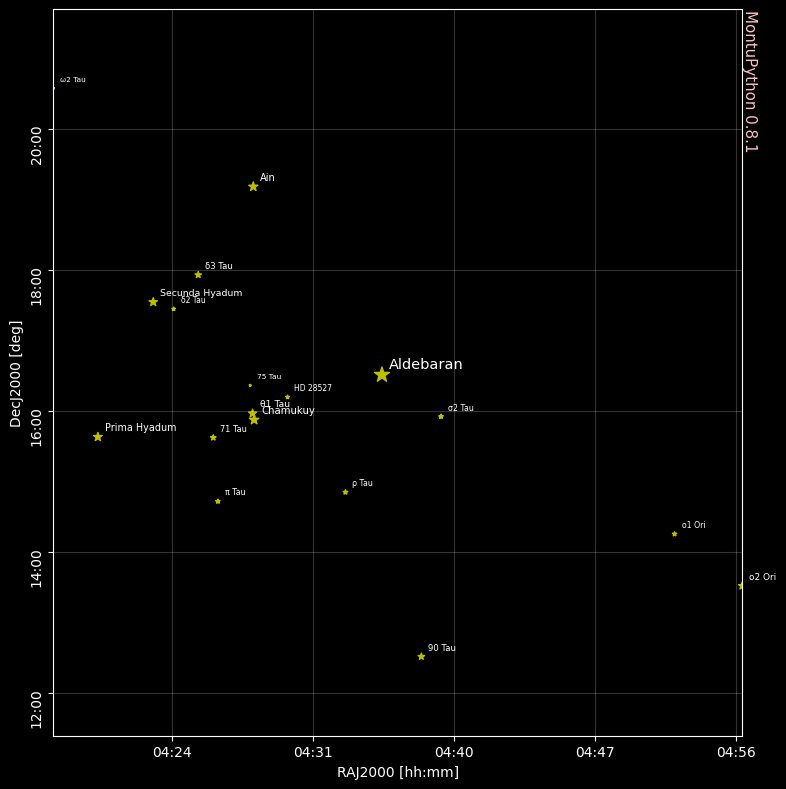

In [17]:
fig,axs = hyades.plot_stars()
fig.savefig('gallery/hyades.png')

<p align="center"><img src="https://github.com/seap-udea/MontuPython/blob/main/dev/gallery/hyades.png?raw=true" alt="Logo""/></p>

Now you can precess the stars:

In [16]:
mtime = montu.Time('-2500-01-01 12:00:00.00')
hyades.where_in_sky(at=mtime,observer=tebas)
print(hyades)

|      |   MN |    HD |   HR |   HIP | Gl        | Name           | OtherDesignations                                                                     | ProperName     | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |    VXJ2000 |    VYJ2000 |    VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |   RAJ2000t |   DecJ2000t |   RAEpoch |   DecEpoch |     epoch_tt |   epoch_jed |      HA |      az |      el |     zen |
|------|------|-------|------|-------|-----------|----------------|---------------------------------------------------------------------------------------|----------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|------------|-

Or compute their horizontal positions:

In [17]:
montu.Heka.where_in_sky(hyades,at=mtime,site=tebas,inplace=True)
TABLEDF(hyades.data)

|      |   MN |    HD |   HR |   HIP | Gl        | Name           | OtherDesignations                                                                     | ProperName     | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |    VXJ2000 |    VYJ2000 |    VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |   RAJ2000t |   DecJ2000t |   RAEpoch |   DecEpoch |     epoch_tt |   epoch_jed |      HA |      az |      el |     zen |
|------|------|-------|------|-------|-----------|----------------|---------------------------------------------------------------------------------------|----------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|------------|-

And plot them again:

In [18]:
fig,axs = hyades.plot_stars(coords=['RAEpoch','DecEpoch'])
fig.savefig('gallery/hyades-precessed.png')

<p align="center"><img src="https://github.com/seap-udea/MontuPython/blob/main/dev/gallery/hyades-precessed.png?raw=true" alt="Logo""/></p>

### Working with time

One of the most interesting and basic functionalities of MontuPython is to convert date among 
different type of calendars and astronomical scales.  You may taste these functionalities using:

In [19]:
mtime = montu.Time('bce2501-01-01 12:00:00')

other alternative formats for the same date are:

In [20]:
mtime = montu.Time('2501 b.c.e. 01-01 12:00:00')
mtime = montu.Time('-2500-01-01 12:00:00')

If you print this time object you will get:

In [21]:
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: -2500-01-01 12:00:00.0002
Date in mixed UTC: -2500-01-22 12:00:00
Date in SPICE format: 2501 B.C. 01-01 12:00:00.200
General:
    Components: [-1, 2500, 1, 1, 12, 0, 0, 200]
    Is bce: True
    Is Julian: True
Uniform scales:
    Terrestrial time:
        tt: -142006202700.3199
        jtd: 807954.69096852
    UTC time:
        et: -142006262399.99988
        jed: 807954.0
    Delta-t = TT - UTC = 59699.68000000001
Objects:
    Date in datetime64 format: -2500-01-01T12:00:00.000200
    Date in PyPlanet Epoch: 807954.0
    Date in PyEphem Epoch: -2501/1/22 12:00:00
    Date in AstroPy Time: 807954.69096852
Astronomical properties at Epoch:
    True obliquity of ecliptic: 23:58:33.587
    True nutation longitude: 00:00:10.214
    Greenwhich Meridian Sidereal Time: 18:40:25.323



Notice that the date in Gregorian proleptic will be 2501 b.c.e 01-01 but in the mixed calendar that uses Julian calendar before its adoption at 1582-10-04, will be 2501 bce 01-22.

You may add or substract time to a given date. This is done by adding or substracting seconds to the reference time:

In [22]:
mtime = montu.Time(0,format='tt')
(mtime,
 mtime - 12*montu.HOUR, 
 mtime + 1*montu.DAY, 
 mtime - 3*montu.CALYEAR, 
 mtime + 20*montu.JULYEAR)

(Time('2000-01-01 12:00:00.0000'/'2000-01-01 12:00:00'),
 Time('2000-01-01 00:00:00.0000'/'2000-01-01 00:00:00'),
 Time('2000-01-02 12:00:00.0000'/'2000-01-02 12:00:00'),
 Time('1997-01-01 12:00:01.5319'/'1997-01-01 12:00:00'),
 Time('2020-01-01 11:59:52.2521'/'2020-01-01 11:59:59'))

As you may notice, adding or substracting and integer number of seconds not necesarily correspond to adding or sutracting days or years to the calendar. This is because of different factors. One of them are the leap seconds. Normally leapseconds are included every once in a while. However to calculate ephemerides in the ancient world, `MontuPython` uses a continuous model of deltat that produces these discrepancies.

### Working with planets and observing sites

`MontuPython` allows calculate the position of all planets in the solar system, including the moon:

In [23]:
earth = montu.Planet('Earth')
mars = montu.Planet('Mars')
neptune = montu.Planet('neptune')
jupiter = montu.Planet('JUPITER')
moon = montu.Planet('Moon')

You may create an observing site in the surface of any planet of the solar system:

In [24]:
tebas = montu.Observer(planet=earth,lon=33,lat=24,height=0)

The straight routine method to calculate position of the planet in the sky at any date is:

In [25]:
mtime = montu.Time('-2500-01-01 12:00:00')
mars.where_among_stars(mtime,tebas)
TABLEDF(mars.position)

|    |    jed |           tt |   RAJ2000 |   DecJ2000 |         pmRA |         paRA |       pmDec |       paDec |   LonJ2000 |   LatJ2000 |        pmLon |        paLon |       pmLat |        paLat |   site_distance |   sun_distance |   elongation |   phase |   mag |      XJ2000 |       YJ2000 |      ZJ2000 |   VXJ2000 |   VYJ2000 |   VZJ2000 |
|----|--------|--------------|-----------|------------|--------------|--------------|-------------|-------------|------------|------------|--------------|--------------|-------------|--------------|-----------------|----------------|--------------|---------|-------|-------------|--------------|-------------|-----------|-----------|-----------|
|  0 | 807954 | -1.42006e+11 |   12.5302 |    1.62005 | -2.06254e+07 | -3.39321e+08 | 1.72852e+08 | 1.61982e+09 |    186.663 |    4.64342 | -3.53556e+08 | -5.33309e+09 | 3.65425e+07 | -5.54062e+08 |         0.66045 |        1.62611 |      157.822 | 13.3589 |  -1.1 | -9.7214e+07 | -1.31655e+07 | 3.00274e+06 

You may get also the position at different times and store it into a data frame:

In [26]:
import numpy as np

# Reset the data stored in the planet
mars.reset_store()

# Loop on different times
for deltat in np.arange(0,100*montu.YEAR,10*montu.YEAR):
    mars.where_among_stars(mtime + deltat,tebas,store=True)

# Show results
TABLEDF(mars.data)

|    |    jed |           tt |   RAJ2000 |   DecJ2000 |         pmRA |         paRA |        pmDec |        paDec |   LonJ2000 |   LatJ2000 |        pmLon |        paLon |        pmLat |        paLat |   site_distance |   sun_distance |   elongation |   phase |   mag |       XJ2000 |       YJ2000 |       ZJ2000 |    VXJ2000 |   VYJ2000 |   VZJ2000 |
|----|--------|--------------|-----------|------------|--------------|--------------|--------------|--------------|------------|------------|--------------|--------------|--------------|--------------|-----------------|----------------|--------------|---------|-------|--------------|--------------|--------------|------------|-----------|-----------|
|  0 | 807954 | -1.42006e+11 | 12.5302   |    1.62005 | -2.06254e+07 | -3.39321e+08 |  1.72852e+08 |  1.61982e+09 |  186.663   |   4.64342  | -3.53556e+08 | -5.33309e+09 |  3.65425e+07 | -5.54062e+08 |        0.66045  |        1.62611 |     157.822  | 13.3589 |  -1.1 | -9.7214e+07  | -1.31655e+0

Once calculated, you can compute the horizontal coordinates as we show before, but, since each table already has a date, you don't need to provide an epoch:

In [27]:
montu.Heka.where_in_sky(mars,site=tebas,inplace=True)
TABLEDF(mars.data)

|    |    jed |           tt |   RAJ2000 |   DecJ2000 |         pmRA |         paRA |        pmDec |        paDec |   LonJ2000 |   LatJ2000 |        pmLon |        paLon |        pmLat |        paLat |   site_distance |   sun_distance |   elongation |   phase |   mag |       XJ2000 |       YJ2000 |       ZJ2000 |    VXJ2000 |   VYJ2000 |   VZJ2000 |   RAJ2000t |   DecJ2000t |   RAEpoch |   DecEpoch |     epoch_tt |   epoch_jed |        HA |        az |        el |      zen |
|----|--------|--------------|-----------|------------|--------------|--------------|--------------|--------------|------------|------------|--------------|--------------|--------------|--------------|-----------------|----------------|--------------|---------|-------|--------------|--------------|--------------|------------|-----------|-----------|------------|-------------|-----------|------------|--------------|-------------|-----------|-----------|-----------|----------|
|  0 | 807954 | -1.42006e+11 | 12.5302  

#### Daily motion of planet and stars

We want to study how the elevation and azimuth of a star changes as time passes at a given epoch.  Let's take the case for instance of Aldebaran in the latest example.

In [28]:
aldebaran_path = montu.Heka.move_over_nut(aldebaran.data,at=mtime,site=tebas,
                                          during=6*montu.HOUR,each=1*montu.HOUR)
TABLEDF(aldebaran_path)

|    |           tt |        HA |      az |      el |     zen | isvisible   |
|----|--------------|-----------|---------|---------|---------|-------------|
|  0 | -1.42006e+11 | 20.2635   | 107.598 | 29.5927 | 60.4073 | True        |
|  1 | -1.42006e+11 | 21.2662   | 117.59  | 42.2888 | 47.7112 | True        |
|  2 | -1.42006e+11 | 22.2689   | 132.53  | 53.5817 | 36.4183 | True        |
|  3 | -1.42006e+11 | 23.2717   | 156.473 | 61.6793 | 28.3207 | True        |
|  4 | -1.42006e+11 |  0.274424 | 189.232 | 63.4436 | 26.5564 | True        |
|  5 | -1.42006e+11 |  1.27716  | 217.992 | 57.8112 | 32.1888 | True        |
|  6 | -1.42006e+11 |  2.2799   | 236.477 | 47.6476 | 42.3524 | True        |


We can plot the path on the sky of the star:

In [31]:
fig,axs = montu.Heka.plot_over_nut(aldebaran_path)
fig.savefig('gallery/aldebaran_over_nut.png')

<p align="center"><img src="https://github.com/seap-udea/MontuPython/blob/main/dev/gallery/aldebaran_over_nut.png?raw=true" alt="Logo""/></p>

We may make the same with planets:

In [32]:
mars.reset_store()
mars.where_among_stars(mtime,tebas,store=True)
mars_path = montu.Heka.move_over_nut(mars.data.iloc[0],at=mtime,site=tebas,
                                     during=12*montu.HOUR,each=1*montu.HOUR)

In [34]:
fig,axs = montu.Heka.plot_over_nut([aldebaran_path,mars_path])
fig.savefig('gallery/mars_over_nut.png')

<p align="center"><img src="https://github.com/seap-udea/MontuPython/blob/main/dev/gallery/mars_over_nut.png?raw=true" alt="Logo""/></p>

## An indepth example: evolution of pole stars

Choose from database all bright stars that according to [wikipedia](https://en.wikipedia.org/wiki/Pole_star#Precession_of_the_equinoxes) were or will be close to the celestial North pole:

In [35]:
star_names = ('Polaris','Vega','Thuban','Deneb','Alderamin','Kochab')
stars = stars.get_stars(ProperName=star_names)
TABLEDF(stars.data)

|     |   MN |     HD |   HR |    HIP | Gl     | Name      | OtherDesignations                                                                   | ProperName   | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |    B-V | SpType       |   Luminosity |     XJ2000 |     YJ2000 |    ZJ2000 |    VXJ2000 |   VYJ2000 |    VZJ2000 |   Primary |   MultipleID |   IsMultiple |   IsVariable |
|-----|------|--------|------|--------|--------|-----------|-------------------------------------------------------------------------------------|--------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|--------|--------------|--------------|------------|------------|-----------|------------|-----------|------------|-----------|--------------|--------------|--------------|
|   5 |    6 | 172167 | 7001 |  91262 | Gl

Now precess the position of all stars from -20 000 to 20 000 years from 2000:

In [36]:
import pandas as pd
import tqdm

now = montu.Time()
df = pd.DataFrame()
for dt in tqdm.tqdm(np.linspace(-20000*montu.YEAR,20000*montu.YEAR,1000)):
    past = now + dt
    pstars = montu.Heka.precess_to_epoch(stars.data,at=past)
    row = dict(tt = past.tt)
    for star in star_names:
        row.update({star:float(pstars[pstars.ProperName == star].DecEpoch)})
    df = pd.concat([df,pd.DataFrame([row])])

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:40<00:00, 24.97it/s]


Now plot declinations as a function of time:

In [37]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,6))
for star in star_names:
    ax.plot(df['tt'],df[star],label=star)

ax.legend(loc='lower center',ncol=len(star_names))
ax.set_xlabel("Time [year]")
ax.set_ylabel("Declination [deg]")
ax.axvline(montu.Time().tt,color='k',lw=3)
ax.text(0.5,1.01,'Now',ha='center',transform=ax.transAxes)
ax.margins(0)
ax.set_xticks(np.linspace(df['tt'].min(),df['tt'].max(),14))
ax.grid()
montu.Time.set_time_ticks(ax)
montu.Util.montu_mark(ax)
fig.savefig('gallery/pole-stars.png')

<p align="center"><img src="https://github.com/seap-udea/MontuPython/blob/main/dev/gallery/pole-stars.png?raw=true" alt="Logo""/></p>

Check date when star is close to the pole:

In [38]:
for star in star_names:
    imax = df[star].argmax()
    mtime = montu.Time(df.iloc[imax].tt)
    print(f"Star {star} will be the closest to the pole at {mtime.datespice} (declination {montu.D2H(df.iloc[imax][star])})")

Star Polaris will be the closest to the pole at 2083-11-17 11:01:31.8674 (declination 89:31:50.395)
Star Vega will be the closest to the pole at 11612 B.C. 11-20 03:50:01.680400 (declination 86:21:54.919)
Star Thuban will be the closest to the pole at 2803 B.C. 11-22 11:11:12.995700 (declination 89:55:30.841)
Star Deneb will be the closest to the pole at 14735 B.C. 09-08 23:18:13.300400 (declination 86:57:7.336)
Star Alderamin will be the closest to the pole at 7529-06-08 04:52:50.0784 (declination 87:58:44.092)
Star Kochab will be the closest to the pole at 1041 B.C. 09-09 10:30:32.478000 (declination 83:29:35.893)


## Other example scripts

You will find a complete set of runable example notebooks –`Colab` notebooks– in the [Google Drive public repository of `MontuPython`](https://drive.google.com/drive/folders/11L59yZ3A1g1ZT7v_dLDPwLMnRMR-tFgE?usp=sharing).

## Advanced examples

For a fully-fledged working example see `examples/montunctions.ipynb`.


## What's new


Versions 0.9.*:
- Major refactoring of inner machinery.
- After many tests we decide to work with the algorithms in `PyEphem` with some support of `PyMeeus/PyPlanets` and minor usage of `spiceypy`.
- The general design of the package is maintained. 

Versions 0.8.*:
- Major refactoring of classes.
- New class Heka, intended to perform calculations.
- New plot of positions in a stereographic projection with respect to the Horizon.
- Now horizontal coordinates of planet and star can be computed.
- New stellar catalogue incorporated to the planet.
- Classes were divided in modules (stars, planets, observer, etc.)
- README has been converted into a notebook.

Versions 0.7.*:
- A Google Drive repository with examples was created.
- More interesting examples added.
- A new class SkyCoordinates allows to precess coordinates of any set of objects.
- Star catalogue coordinates are now given in J2000.
- Some improvements in the `plot_stars`` method.
- A new `sid_to_tai` for `MonTime` class for calculating the ratio of sidereal to TAI time.

Versions 0.6.*:
- Refactor of MonTime class.
- Corrected a problem with tt during the years 300-1582.
- General cleaning of the package.
- Kernels are separated into basic kernels (which are automatically loaded).
- Julian day dates are rounded-up to 7 figures to avoid representation artifacts.
- Package now load ALL_STARS from import.

Versions 0.5.*:
- New properties (distances, phase angle, magnituded) added to PlanetaryBody class method.
- Solved the DEBUG problem.
- First fully-fledge working script, yay!
- MonTime class is now able to produce dates in all relevant calendars and formats.
- Verified ephemerides calculations for planets.
- Major improvements of all functionalities.

Version 0.1.*:

- First classes created and tested with study case.
- A proper identifying image of the project has been found.
- The project is started!

------------

This package has been designed and written by Jorge I. Zuluaga with the historical advise of egyptologist Francisco "Tito" Vivas (C) 2023